# Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report,accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

# Importing The Dataset(Processed data)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Unnamed: 0,area1,concavity1,concave_points1,fractal_dimension1,texture2,perimeter2,compactness2,symmetry2,fractal_dimension2,texture3,perimeter3,compactness3,concavity3,concave_points3,fractal_dimension3,Diagnosis
0,0,0.548034,0.937384,0.906961,0.880551,0.236609,0.965721,0.630753,0.641079,0.486734,0.172571,0.854245,0.935673,0.838263,0.909293,0.784907,1.0
1,1,0.762470,0.269899,0.426593,0.205513,0.162210,0.325647,0.145973,0.173903,0.242274,0.370166,0.684853,0.225707,0.283045,0.627960,0.417650,1.0
2,2,0.681314,0.615852,0.787072,0.307198,0.185216,0.472010,0.509693,0.423121,0.337725,0.439064,0.643490,0.578319,0.529546,0.829925,0.399951,1.0
3,3,0.142320,0.753607,0.645328,0.391622,0.345429,0.331443,0.975060,0.359837,0.763716,0.470588,0.291379,0.332234,0.808749,0.881302,0.357683,1.0
4,4,0.743336,0.617730,0.639708,0.271669,0.182785,0.577189,0.301410,0.280132,0.387701,0.151121,0.641521,0.252979,0.470046,0.544694,0.267207,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,0.776326,0.991547,0.908834,0.576723,0.289001,0.986560,0.550675,0.367257,0.488572,0.565161,0.818134,0.569574,0.776874,0.869609,0.536996,1.0
552,552,0.863420,0.761434,0.855758,0.192037,0.388836,0.852774,0.359379,0.094304,0.307224,0.467338,0.732782,0.262317,0.482678,0.754100,0.198009,1.0
553,553,0.719583,0.448668,0.599808,0.164472,0.912753,0.548212,0.296287,0.321234,0.147283,0.852454,0.659904,0.234007,0.377372,0.545757,0.139258,1.0
554,554,0.453748,0.287463,0.319504,0.199694,0.310270,0.328977,0.472620,0.153352,0.275346,0.718232,0.474099,0.407719,0.399567,0.471349,0.284661,1.0


In [4]:
df.shape

(556, 17)

In [5]:
df_n=df.drop('Unnamed: 0', axis = 1,inplace=True)

In [6]:
df

,area1,concavity1,concave_points1,fractal_dimension1,texture2,perimeter2,compactness2,symmetry2,fractal_dimension2,texture3,perimeter3,compactness3,concavity3,concave_points3,fractal_dimension3,Diagnosis
0,0.548034,0.937384,0.906961,0.880551,0.236609,0.965721,0.630753,0.641079,0.486734,0.172571,0.854245,0.935673,0.838263,0.909293,0.784907,1.0
1,0.762470,0.269899,0.426593,0.205513,0.162210,0.325647,0.145973,0.173903,0.242274,0.370166,0.684853,0.225707,0.283045,0.627960,0.417650,1.0
2,0.681314,0.615852,0.787072,0.307198,0.185216,0.472010,0.509693,0.423121,0.337725,0.439064,0.643490,0.578319,0.529546,0.829925,0.399951,1.0
3,0.142320,0.753607,0.645328,0.391622,0.345429,0.331443,0.975060,0.359837,0.763716,0.470588,0.291379,0.332234,0.808749,0.881302,0.357683,1.0
4,0.743336,0.617730,0.639708,0.271669,0.182785,0.577189,0.301410,0.280132,0.387701,0.151121,0.641521,0.252979,0.470046,0.544694,0.267207,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.776326,0.991547,0.908834,0.576723,0.289001,0.986560,0.550675,0.367257,0.488572,0.565161,0.818134,0.569574,0.776874,0.869609,0.536996,1.0
552,0.863420,0.761434,0.855758,0.192037,0.388836,0.852774,0.359379,0.094304,0.307224,0.467338,0.732782,0.262317,0.482678,0.754100,0.198009,1.0
553,0.719583,0.448668,0.599808,0.164472,0.912753,0.548212,0.296287,0.321234,0.147283,0.852454,0.659904,0.234007,0.377372,0.545757,0.139258,1.0
554,0.453748,0.287463,0.319504,0.199694,0.310270,0.328977,0.472620,0.153352,0.275346,0.718232,0.474099,0.407719,0.399567,0.471349,0.284661,1.0


## A. Data Imbalancing/ Test and Train

### The output of GA algorithm is used

In [32]:
Y = df['Diagnosis']
X = df.drop('Diagnosis', axis = 1)

In [57]:
# We have to balance our training set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0, stratify = Y)

In [58]:
X_train

,area1,concavity1,concave_points1,fractal_dimension1,texture2,perimeter2,compactness2,symmetry2,fractal_dimension2,texture3,perimeter3,compactness3,concavity3,concave_points3,fractal_dimension3
352,0.046582,0.145638,0.137111,0.497703,0.364528,0.434032,0.360457,0.593030,0.301253,0.184595,0.070777,0.134108,0.109279,0.137648,0.236849
30,0.605437,0.723864,0.765217,0.367841,0.479990,0.593958,0.424492,0.352785,0.336714,0.714657,0.696015,0.580097,0.721860,0.623708,0.525811
394,0.179665,0.079422,0.100582,0.166922,0.297248,0.109988,0.131953,0.089093,0.088395,0.263893,0.217648,0.182575,0.176559,0.212552,0.216077
244,0.155648,0.133334,0.171329,0.358959,0.294210,0.114550,0.135188,0.257265,0.173557,0.298018,0.173265,0.183613,0.210795,0.309353,0.283309
121,0.325505,0.282346,0.301040,0.576110,0.361459,0.261738,0.318020,0.359837,0.824992,0.389015,0.829952,0.578170,0.682901,0.765438,0.307891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.279295,0.044858,0.118815,0.271669,0.435281,0.120838,0.076667,0.218768,0.109525,0.440689,0.277395,0.098536,0.060215,0.165781,0.197763
422,0.218329,0.041727,0.103017,0.167841,0.227190,0.166708,0.127909,0.333391,0.026201,0.290543,0.225724,0.091495,0.038776,0.096900,0.064036
270,0.174980,0.183458,0.450758,0.269219,0.838962,0.402466,0.170374,0.547007,0.193584,0.226519,0.163942,0.073161,0.082267,0.285897,0.065020
73,0.272961,0.241691,0.304955,0.480858,0.112987,0.147965,0.248025,0.124986,0.205343,0.287293,0.366424,0.474121,0.325900,0.458948,0.589479


In [59]:
Y_train

352    0.0
30     1.0
394    0.0
244    0.0
121    1.0
      ... 
351    0.0
422    0.0
270    0.0
73     1.0
48     0.0
Name: Diagnosis, Length: 333, dtype: float64

In [60]:
# Over Sampling

sm = SMOTE(random_state = 2)

print("\nClass 1 before Over Sampling --> ", sum(Y_train == 1))
print("\nClass 0 before Over Sampling --> ", sum(Y_train == 0))


# X_train after Over Sampling --> X_train_OS
# Y_train after Over Sampling --> Y_train_OS
X_train_OS, Y_train_OS = sm.fit_resample(X_train, Y_train.ravel())

print("\nThe shape of the X after Over Sampling -->", X_train_OS.shape)
print("\nThe shape of the Y after Over Sampling -->", Y_train_OS.shape)

print("\nClass 1 after Over Sampling --> ", sum(Y_train_OS == 1))
print("\nClass 0 after Over Sampling --> ", sum(Y_train_OS == 0))
print("\n")


Class 1 before Over Sampling -->  127

Class 0 before Over Sampling -->  206

The shape of the X after Over Sampling --> (412, 15)

The shape of the Y after Over Sampling --> (412,)

Class 1 after Over Sampling -->  206

Class 0 after Over Sampling -->  206




In [61]:
X_train_OS.shape, Y_train_OS.shape

((412, 15), (412,))

In [62]:
X_test.shape, Y_test.shape

((223, 15), (223,))

In [63]:
type(X_train_OS)

pandas.core.frame.DataFrame

# B. Building PyTorch model

In [64]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [65]:
# Dataframe to tensor and device
X_train = torch.tensor(X_train_OS.values, dtype = torch.float32).to(device)
y_train = torch.tensor(Y_train_OS, dtype = torch.float32).to(device)
X_test = torch.tensor(X_test.values, dtype = torch.float32).to(device)
y_test = torch.tensor(Y_test.values, dtype = torch.float32).to(device)

In [66]:
X_train.shape, X_train.dtype

(torch.Size([412, 15]), torch.float32)

In [67]:
y_train.shape, y_train.dtype

(torch.Size([412]), torch.float32)

In [68]:
X_test.shape, X_test.dtype

(torch.Size([223, 15]), torch.float32)

In [69]:
y_test.shape, y_test.dtype

(torch.Size([223]), torch.float32)

## B.1 Model 0
1 hidden layer with 8 neurons

### Constructing the model

In [70]:
param_grid_mlp = {
    'hidden_layer_sizes': [(8)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'early_stopping': [True],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.01],
    'max_iter': [1000],
    'random_state': [42]}
CV = StratifiedKFold(n_splits = 3)
model_0 = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=CV,
                     scoring='accuracy',verbose=False)
model_0.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'early_stopping': [True],
                         'hidden_layer_sizes': [8],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.01], 'max_iter': [1000],
                         'random_state': [42], 'solver': ['sgd']},
             scoring='accuracy', verbose=False)

In [71]:
model_0.best_score_

0.8299481646038295

## B.2 Model 1
2 hidden layer with 8 neurons

### Constructing the model

In [139]:
param_grid_mlp = {
    'hidden_layer_sizes': [(8,8)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'early_stopping': [True],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.01],
    'max_iter': [1000],
    'random_state': [42]}
CV = StratifiedKFold(n_splits = 3)
model_1 = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=CV,
                     scoring='accuracy',verbose=False)
model_1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'early_stopping': [True],
                         'hidden_layer_sizes': [(8, 8)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.01], 'max_iter': [1000],
                         'random_state': [42], 'solver': ['sgd']},
             scoring='accuracy', verbose=False)

In [140]:
model_1.best_score_

0.9320674212771959

# C.Tuning

In [141]:
param_grid_mlp = {
    'hidden_layer_sizes': [(8),(16), (32), (8,4),(8,8),(16,16),(16,8),(32,32),(8,4,8),(8,16,8),(8,8,8)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'early_stopping': [True],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1, 0.01, 0.05, 0.001],
    'max_iter': [1000,2000],
    'random_state': [42]}
CV = StratifiedKFold(n_splits = 3)
model_2 = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=CV,
                     scoring='accuracy',verbose=False)
model_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [8, 16, 32, (8, 4), (8, 8),
                                                (16, 16), (16, 8), (32, 32),
                                                (8, 4, 8), (8, 16, 8),
                                                (8, 8, 8)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.1, 0.01, 0.05, 0.001],
                         'max_iter': [1000, 2000], 'random_state': [42],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=False)

In [142]:
model_2.best_params_

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (8, 16, 8),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 1000,
 'random_state': 42,
 'solver': 'adam'}

In [143]:
model_2.best_score_

0.9708910751436933

In [144]:
model_3 = MLPClassifier(**model_2.best_params_)

In [145]:
model_3.fit(X_train, y_train)
CV = StratifiedKFold(n_splits = 3)
CV_scores = cross_val_score(model_3, X_train, y_train, cv=CV)
CV_score_df = pd.DataFrame(CV_scores, columns = ['Accuracy'])
display(CV_score_df)
print('The Average of CV 3 Fold Scores -->', CV_score_df.Accuracy.mean())

,Accuracy
0,0.963768
1,0.978102
2,0.970803


The Average of CV 3 Fold Scores --> 0.9708910751436933


## Implementation on test data

In [146]:
y_predict = model_3.predict(X_test)
confusion = confusion_matrix(Y_test, y_predict)
accuracy = accuracy_score(Y_test, y_predict)
precision = precision_score(Y_test, y_predict)
recall = recall_score(Y_test, y_predict)
f1 = f1_score(Y_test, y_predict)
auc = roc_auc_score(Y_test, y_predict)

# Print the results
print("Confusion matrix:")
print(confusion)
print('\nReport:\n', classification_report(Y_test, y_predict))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("AUC: {:.2f}%".format(auc * 100))

Confusion matrix:
[[137   1]
 [ 11  74]]

Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       138
         1.0       0.99      0.87      0.93        85

    accuracy                           0.95       223
   macro avg       0.96      0.93      0.94       223
weighted avg       0.95      0.95      0.95       223

Accuracy: 94.62%
Precision: 98.67%
Recall: 87.06%
F1 score: 92.50%
AUC: 93.17%


Text(45.722222222222214, 0.5, 'Real')

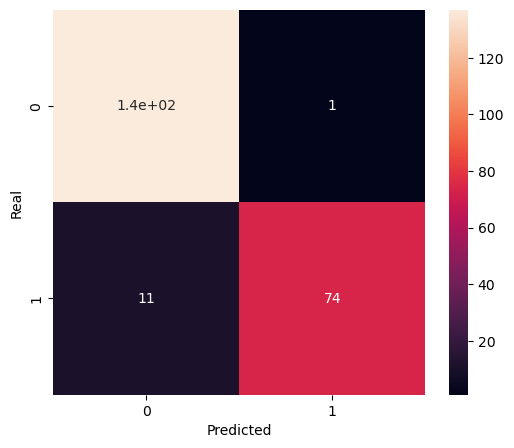

In [87]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Real')